In [1]:
% matplotlib inline
from rlpy.CustomDomains import RCSegment

In [10]:
testCar = RCSegment(rewardfile="reward/simple/rewardfull.p")
# testCar = RCSegment(rewardfile="rewardhalf.p")
testCar.s0()

(array([ 0.,  0.,  0.,  0.]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

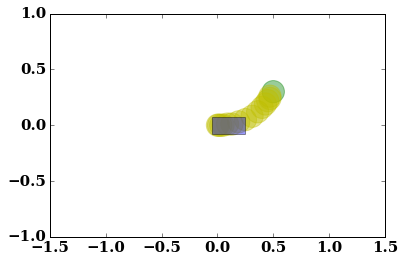

In [11]:
% matplotlib inline
testCar.show_inline()

(-0.1, array([ 0.43863276, -0.19360968,  0.3       , -0.95262794]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(-0.1, array([ 0.55481041, -0.33021261,  0.3       , -0.60621778]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(-0.1, array([ 0.71046672, -0.41925597,  0.3       , -0.25980762]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(-0.1, array([ 0.88710898, -0.45016097,  0.3       ,  0.08660254]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(-0.1, array([ 1.06375124, -0.41925597,  0.3       ,  0.4330127 ]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(-0.1, array([ 1.21940755, -0.33021261,  0.3       ,  0.77942286]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(-0.1, array([ 1.3355852 , -0.19360968,  0.3       ,  1.12583302]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(-0.1, array([ 1.39848173, -0.02567626,  0.3       ,  1.47224319]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(-0.1, array([ 1.40062472,  0.15363636,  0.3       ,  1.81865335]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(

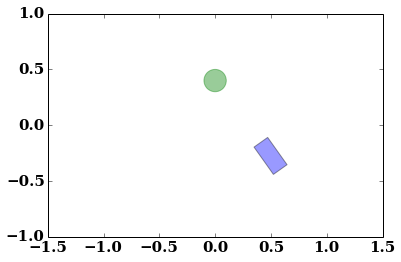

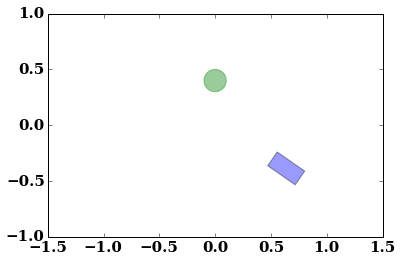

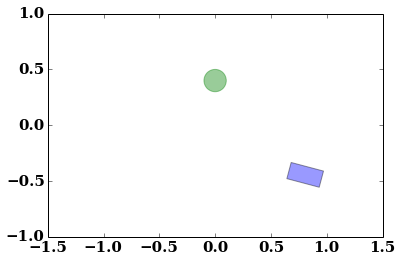

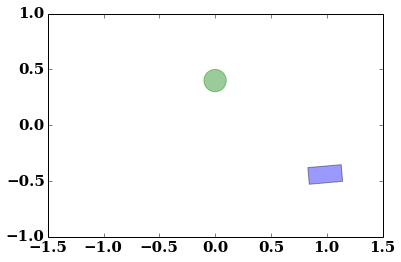

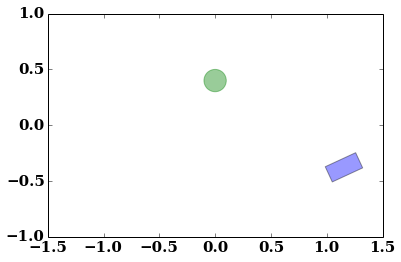

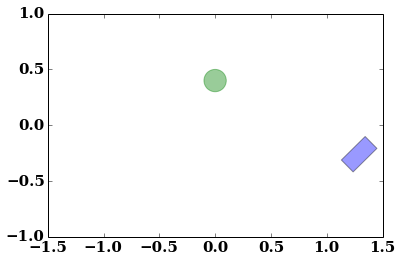

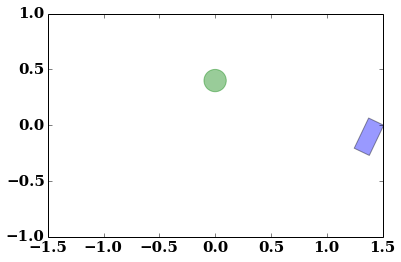

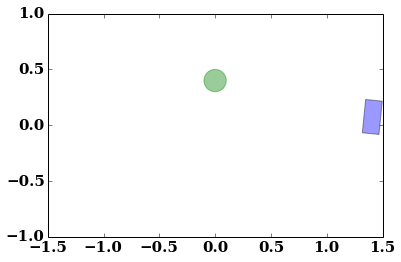

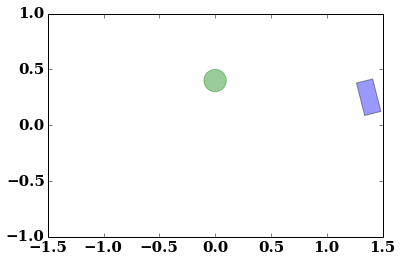

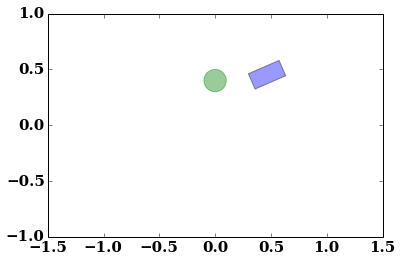

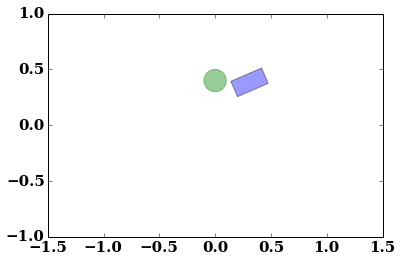

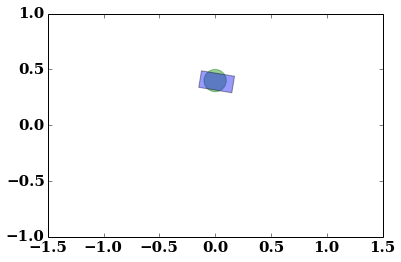

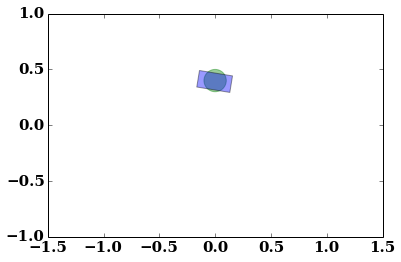

In [8]:
###  B N F
### [0 1 2] - negative angle
### [3 4 5] - neutral angle
### [6 7 8] - positive angle

def go(d, num, p=True):
    actions = []
    for i in range(num):
        n = testCar.step(d)
        actions += [n]
        if n[2]:
            print n
    print n
    if p:
        testCar.show_inline()
    return actions

REVERSE_RIGHT, COAST_RIGHT, DRIVE_RIGHT = range(3)
REVERSE_, COAST_, DRIVE_ = range(3, 6)
REVERSE_LEFT, COAST_LEFT, DRIVE_LEFT = range(6, 9)

testCar.s0()
actions = []
actions += go(DRIVE_RIGHT, 11) #, p=False)
for _ in range(8):
    actions += go(DRIVE_LEFT, 2) #, p=False)
actions += go(DRIVE_LEFT, 6, p=False)
actions += go(COAST_LEFT, 4, p=False)
actions += go(COAST_, 2)
actions += go(REVERSE_, 2)
actions += go(REVERSE_RIGHT, 6)
actions += go(REVERSE_, 1) 


In [9]:
testCar.get_car_corners(testCar.state)

[(-0.16434762657061044, 0.34216636477361911),
 (-0.14008490210096902, 0.49019109311760312),
 (0.15596455458699898, 0.44166564417832022),
 (0.13170183011735753, 0.29364091583433627)]

In [10]:
import numpy as np
x = np.array([a[1] for a in actions])

In [11]:
y = [[round(a, 2) for a in n] for n in x]
print y

[[0.0, 0.0, 0.03, 0.0], [0.01, 0.0, 0.06, -0.02], [0.03, -0.0, 0.09, -0.05], [0.05, -0.0, 0.12, -0.1], [0.09, -0.01, 0.15, -0.17], [0.13, -0.01, 0.18, -0.26], [0.19, -0.03, 0.21, -0.36], [0.25, -0.05, 0.24, -0.48], [0.31, -0.08, 0.27, -0.62], [0.37, -0.13, 0.3, -0.78], [0.44, -0.19, 0.3, -0.95], [0.49, -0.27, 0.3, -0.78], [0.55, -0.33, 0.3, -0.61], [0.63, -0.38, 0.3, -0.43], [0.71, -0.42, 0.3, -0.26], [0.8, -0.44, 0.3, -0.09], [0.89, -0.45, 0.3, 0.09], [0.98, -0.44, 0.3, 0.26], [1.06, -0.42, 0.3, 0.43], [1.15, -0.38, 0.3, 0.61], [1.22, -0.33, 0.3, 0.78], [1.28, -0.27, 0.3, 0.95], [1.34, -0.19, 0.3, 1.13], [1.37, -0.11, 0.3, 1.3], [1.4, -0.03, 0.3, 1.47], [1.41, 0.06, 0.3, 1.65], [1.4, 0.15, 0.3, 1.82], [1.38, 0.24, 0.3, 1.99], [1.34, 0.32, 0.3, 2.17], [1.29, 0.4, 0.3, 2.34], [1.23, 0.46, 0.3, 2.51], [1.16, 0.52, 0.3, 2.68], [1.08, 0.56, 0.3, 2.86], [0.99, 0.58, 0.3, 3.03], [0.9, 0.59, 0.3, -3.08], [0.81, 0.58, 0.3, -2.91], [0.72, 0.56, 0.3, -2.73], [0.64, 0.53, 0.3, -2.73], [0.56, 0.49

In [12]:
import pickle

with open("reward/rewardlong.p", "w") as f:
    pickle.dump(y, f)

In [46]:
a = np.array([1, 2, 3])

IndexError: index 3 is out of bounds for axis 1 with size 3